##Last homework:

* María Paula Rubiano

Solve the same equations using scipy.integrate.odeint and scipy.integrate.solve_ivp

$\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*}$

for the parameters:

$\sigma =10$

$\rho=28$

$\beta=8/3$

lets set intial conditions:

$x(0)=1.0$
$y(0)=1.0$
$z(0)=1.0$

Compare the results. Seeing anything strange?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
sigma = 10.
beta = 8. / 3.
rho = 28.

def func(t0, y0):

  func = np.zeros(3)
  func[0] = sigma * (y0[1] - y0[0])
  func[1] = y0[0] * (rho - y0[2]) - y0[1]
  func[2] = y0[0] * y0[1] - beta * y0[2]
    
  return func


In [42]:

def rungeKutta4(tf, y0, func, h):
    t = np.arange(tf[0], tf[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    
    for i in range(0, len(t) - 1):
        
        k1 = func(t[i], y[i])
        k2 = func(t[i] + h * 0.5, y[i] + k1 * h * 0.5)
        k3 = func(t[i] + h * 0.5, y[i] + k2 * h * 0.5)
        k4 = func(t[i] + h, y[i] + k3 * h)
        
        y[i + 1] = y[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return t, y

In [3]:
def Dty(yi, ti):  
    
    f = np.zeros(3)
    f[0] = sigma * (yi[1] - yi[0])
    f[1] = yi[0] * (rho - yi[2]) - yi[1]
    f[2] = yi[0] * yi[1] - beta * yi[2]
    
    return f

In [4]:
from scipy import integrate

In [49]:
tf = [0., 40.] 
y0 = np.array([1.0,
               1.0, 
               1.0])
h = 0.01  

t, y = rungeKutta4(tf, y0, func, h)

In [50]:
todeint = np.linspace(tf[0], tf[1], 2000)
yodeint = integrate.odeint(Dty, y0, t)

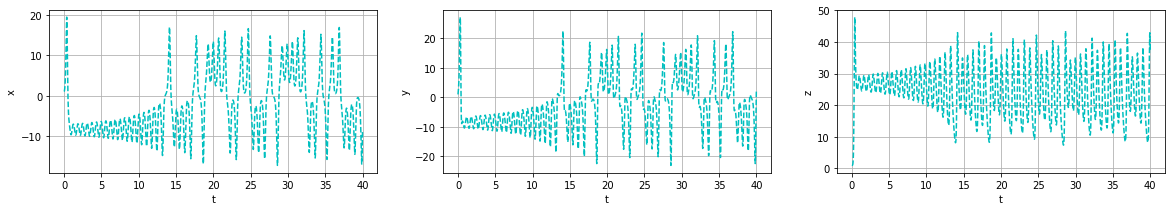

In [51]:
fig, axis = plt.subplots(1,3, figsize = (20,3))

axis[0].plot(t, y[:, 0], '--c')
axis[0].set_xlabel('t')
axis[0].set_ylabel('x')
axis[0].grid()

axis[1].plot(t, y[:, 1], '--c')
axis[1].set_xlabel('t')
axis[1].set_ylabel('y')
axis[1].grid()

axis[2].plot(t, y[:, 2], '--c')
axis[2].set_xlabel('t')
axis[2].set_ylabel('z')
axis[2].grid()

Text(0.5, 0.92, 'Lorenz 3D Plot')

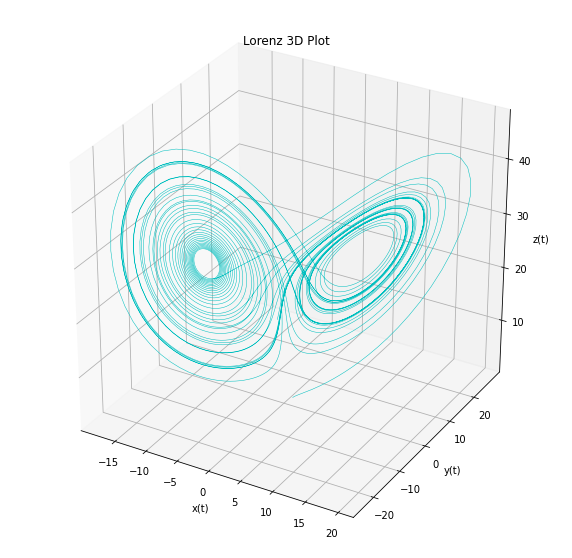

In [52]:
fig = plt.figure (figsize = (10,10))

axis = fig.gca (projection = '3d')
axis.plot (yodeint[:, 0], yodeint[:, 1], yodeint[:, 2], linewidth = 0.5, color = 'c')
axis.set_xlabel('x(t)')
axis.set_ylabel('y(t)')
axis.set_zlabel('z(t)')
axis.set_title('Lorenz 3D Plot')

##scipy.integrate.solve_ivp:

In [53]:
obj = integrate.solve_ivp(func, tf, y0, method = 'RK45', t_eval = todeint)
tsolve_ivp = obj.t
ysolve_ivp = obj.y

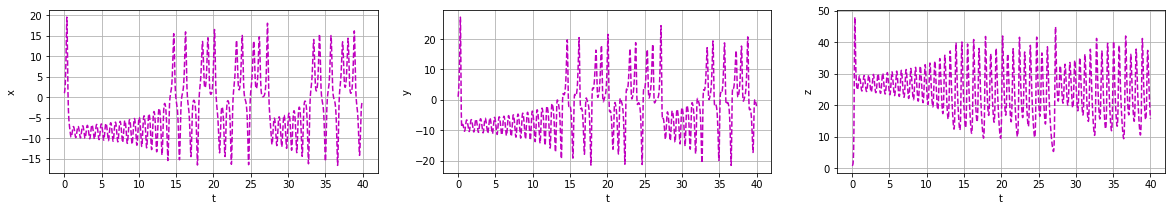

In [54]:
fig, axis = plt.subplots(1,3, figsize = (20,3))

axis[0].plot(tsolve_ivp, ysolve_ivp[ 0 , :], '--m')
axis[0].set_xlabel('t')
axis[0].set_ylabel('x')
axis[0].grid()

axis[1].plot(tsolve_ivp, ysolve_ivp[ 1 , :], '--m')
axis[1].set_xlabel('t')
axis[1].set_ylabel('y')
axis[1].grid()

axis[2].plot(tsolve_ivp, ysolve_ivp[ 2 , :], '--m')
axis[2].set_xlabel('t')
axis[2].set_ylabel('z')
axis[2].grid()

Text(0.5, 0, 'z(t)')

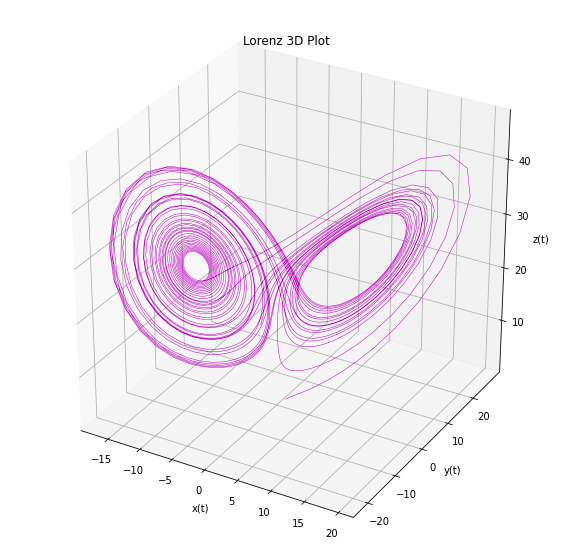

In [55]:
fig = plt.figure (figsize = (10, 10))
axis = fig.gca (projection = '3d')
axis.plot (ysolve_ivp[0, :], ysolve_ivp[1, :], ysolve_ivp[2, :], linewidth = 0.5, color = 'm')
axis.set_title('Lorenz 3D Plot')
axis.set_xlabel('x(t)')
axis.set_ylabel('y(t)')
axis.set_zlabel('z(t)')
